# Create Topic Model for Incidents

In [1]:
suppressMessages(library(here))
suppressMessages(library(tidyverse))
library(tidytext)
library(SnowballC)
library(topicmodels)
library(ldatuning)

Used data as of Oct 12, 2020.

Original exploration can be found at: https://julianbarg.github.io/spills/inquiries/incident_variance/2020-08-03.slides.html#/

In [2]:
# library(oildata)
# usethis::use_data(incidents, overwrite = T)
load(here("data", "incidents.rda"))

In [3]:
head(incidents)

DATAFILE_AS_OF,significant,serious,incident_ID,ID,name,state,on_offshore,system,item,⋯,date,long,lat,water_contamination,manufacture_year,surface_water_remediation,groundwater_remediation,soil_remediation,vegetation_remediation,wildlife_remediation
<dttm>,<lgl>,<lgl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<date>,<chr>,<chr>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2020-09-30 09:25:37,TRUE,FALSE,19860003,22907,Wyco Pipe Line,CO,onshore,Line Pipe,Pipe,⋯,1986-01-05,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-09-30 09:25:37,TRUE,FALSE,19860005,18194,Seminole Pipeline,TX,onshore,Pumping Station,No Data,⋯,1986-01-12,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-09-30 09:25:37,TRUE,FALSE,19860027,12628,Mobil Pipeline,TX,onshore,Tank Farm,Tank,⋯,1986-01-29,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-09-30 09:25:37,TRUE,FALSE,19860028,12628,Mobil Pipeline,TX,onshore,Line Pipe,Pipe,⋯,1986-01-14,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-09-30 09:25:37,TRUE,FALSE,19860029,18273,Shell Pipe Line,TX,onshore,Line Pipe,Pipe,⋯,1986-02-06,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-09-30 09:25:37,TRUE,FALSE,19860030,18273,Shell Pipe Line,TX,onshore,Line Pipe,Pipe,⋯,1986-01-29,NA,NA,NA,NA,NA,NA,NA,NA,NA


### We want to grab the company names, so we can remove those from the dataset

In [4]:
company_names <- unique(word(incidents$name, 1))
(company_names)

[1] "Wyco"             "Seminole"         "Mobil"           
  [4] "Shell"            "Sun"              "Phillips"        
  [7] "Jayhawk"          "Wood"             "Four"            
 [10] "Conoco"           "Amoco"            "Ashland"         
 [13] "Mid"              "Arco"             "Marathon"        
 [16] "Buckeye"          "Chevron"          "Southern"        
 [19] "Unocal"           "Farmers"          "Coastal"         
 [22] "Hydrocarbon"      "Portal"           "Texaco"          
 [25] "Continental"      "Total"            "Tesoro"          
 [28] "Shamrock"         "Texas"            "Kiantone"        
 [31] "Cenex"            "Williams"         "Lakehead"        
 [34] "West"             "Olympic"          "Exxon"           
 [37] "Miami"            "Wesco"            "Fina"            
 [40] "Rancho"           "Colonial"         "Harbor"          
 [43] "Cayuse"           "Calnev"           "Yellowstone"     
 [46] "Sunniland"        "Enron"            "Portland"        
 [49] "Comyn"            "Sohio"            "Explorer"        
 [52] "Allegheny"        "Seadrift"         "Koch"            
 [55] "San"              "Beacon"           "American"        
 [58] "D"                "Gulf"             "Scurlock"        
 [61] "Kaneb"            "Badger"           "Florida"         
 [64] "Amber"            "Black"            "Plantation"      
 [67] "Atlantic"         "Dome"             "Chase"           
 [70] "Steuart"          "Emerald"          "Con"             
 [73] "Golden"           "Belle"            "Union"           
 [76] "Ciniza"           "Douglas"          "Houston"         
 [79] "Citgo"            "Dixie"            "Pride"           
 [82] "Enterprise"       "Cabot"            "Oxy"             
 [85] "Csx"              "Witco"            "All"             
 [88] "Navajo"           "Pacific"          "Lake"            
 [91] "Quanah"           "Meridian"         "Paramount"       
 [94] "Platte"           "Bp"               "Placid"          
 [97] "Associated"       "Loop"             "Sigmor"          
[100] "Carswell"         "Santa"            "Hoechst"         
[103] "Arbuckle"         "Endicott"         "Pennzoil"        
[106] "Diamond"          "Powerine"         "Alyeska"         
[109] "Tampa"            "Sinclair"         "Trans"           
[112] "Western"          "Central"          "Tenneco"         
[115] "Giant"            "Kerr"             "Coastline"       
[118] "Bayside"          "T"                "Hunt"            
[121] "Piney"            "Hawiian"          "National"        
[124] "Chemoil"          "High"             "Oxychem"         
[127] "Minnesota"        "Norco"            "Interstate"      
[130] "Mapco"            "Kern"             "Cook"            
[133] "Devon"            "Richardson,"      "Wolverine"       
[136] "Indiana"          "Panola"           "B"               
[139] "Westtex"          "Amerada"          "Murphy"          
[142] "Liquid"           "Warren"           "Laclede"         
[145] "Howell"           "Tosco"            "Dow"             
[148] "Gatx"             "Oiltanking"       "Valero"          
[151] "Vk-Main"          "South"            "Forest"          
[154] "Mid-Valley"       "Wamsutter"        "Lyondell"        
[157] "Colorado"         "Bridgeline"       "Promix"          
[160] "Panenergy"        "Te"               "Pgc"             
[163] "Eott"             "Torch"            "Star"            
[166] "Kinder"           "El"               "Aera"            
[169] "Seaway"           "Stolthaven"       "The"             
[172] "Equistar"         "Dynegy"           "Equilon"         
[175] "Farmland"         "Transmontaigne"   "Duke"            
[178] "Dynair"           "Pg"               "Los"             
[181] "Huntsman"         "Teppco"           "Genesis"         
[184] "Clark"            "Support"          "Plains"          
[187] "Lion"             "Hyperion"         "Premcor"         
[190] "Tidewater"        "Holly" 

Limite data set to observation period and only retain relevant columns.

In [5]:
df <- subset(incidents, on_offshore == "onshore" & commodity %in% c("rpp", "crude") & year >= 2004 & year < 2020)
df <- subset(df, !is.na(narrative))
narratives <- select(df, incident_ID, narrative)

## Create document-term matrix

In [6]:
word_counts <- narratives %>%
    unnest_tokens(word, narrative) %>%
    anti_join(data.frame(word = str_to_lower(company_names)), by = "word") %>%
    anti_join(stop_words, by = "word") %>%
    filter(! str_detect(word, "^[0-9]")) %>%
    mutate(word = wordStem(word)) %>%
    count(incident_ID, word, sort = T) %>%
    cast_dtm(document = incident_ID, term = word, 
             value = n)
word_counts

<<DocumentTermMatrix (documents: 4096, terms: 7888)>>
Non-/sparse entries: 195788/32113460
Sparsity           : 99%
Maximal term length: 142
Weighting          : term frequency (tf)

## Run topicmodels
Models based on data as of Oct 12, 2020.

In [7]:
# results_1 <- FindTopicsNumber(word_counts, 
#                               topics = c(5, 10, 20, 40, 80, 120, 160), 
#                               metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                               method = "Gibbs", 
#                               control = list(seed = 532))
# saveRDS(results_1, file = ".temp/results_1.rds")
results_1 <- readRDS(".temp/results_1.rds")

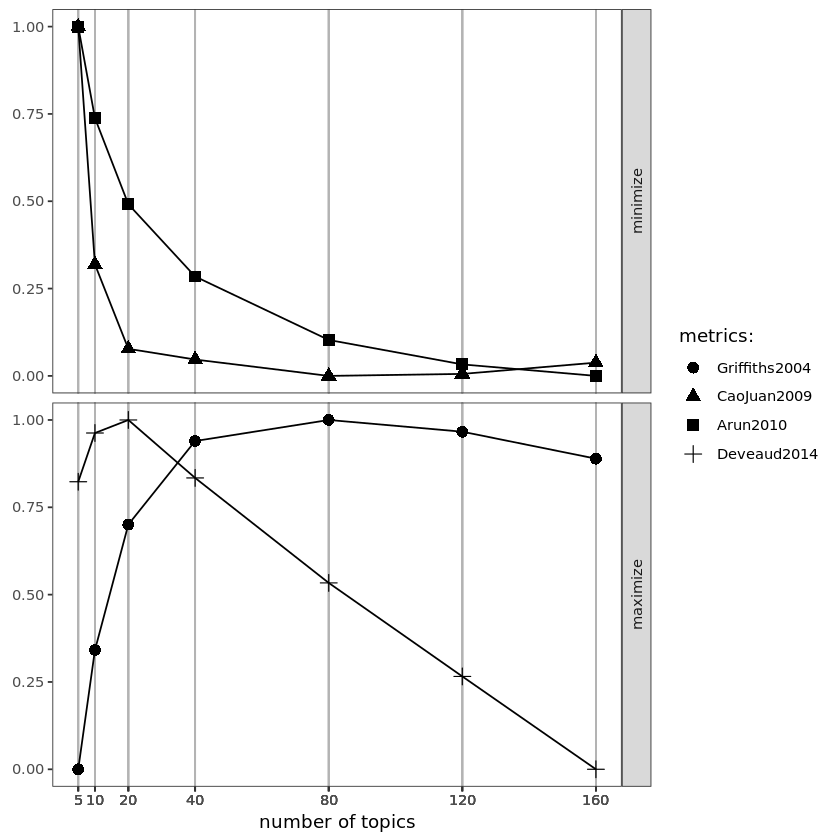

In [8]:
FindTopicsNumber_plot(results_1)

In [9]:
# results_2 <- FindTopicsNumber(word_counts, 
#                             topics = c(15, 18, 19, 20, 21, 22, 25), 
#                             metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                             method = "Gibbs", 
#                             control = list(seed = 544))
# saveRDS(results_2, file = ".temp/results_2.rds")
results_2 <- readRDS(".temp/results_2.rds")

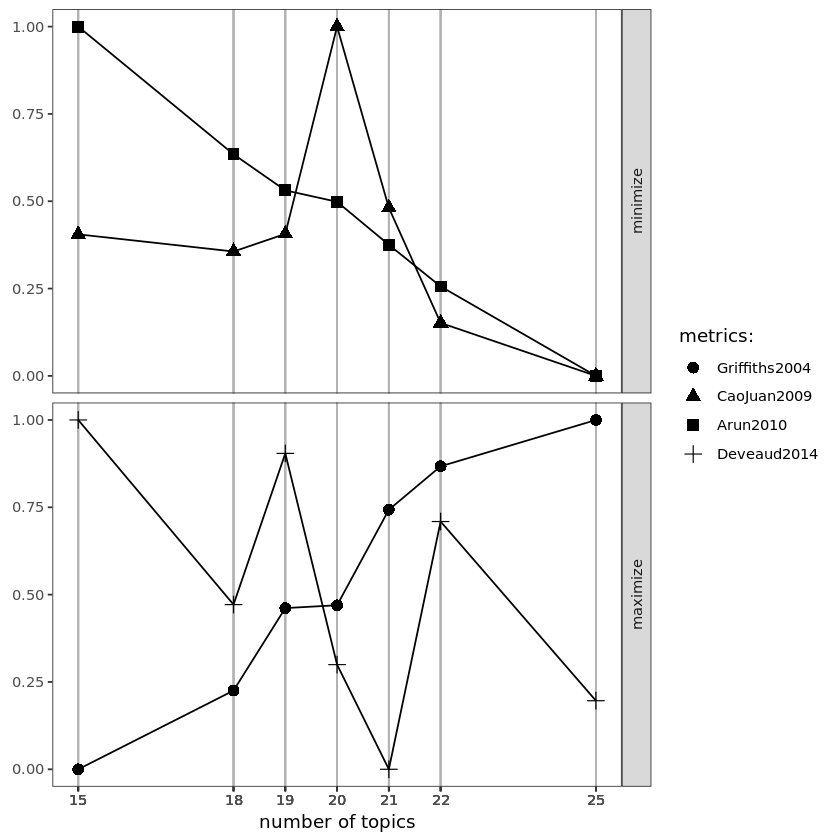

In [10]:
FindTopicsNumber_plot(results_2)

In [11]:
# results_3 <- FindTopicsNumber(word_counts, 
#                             topics = seq(15, 35), 
#                             metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                             method = "Gibbs", 
#                             control = list(seed = 912))
# saveRDS(results_3, file = ".temp/results_3.rds")
results_3 <- readRDS(".temp/results_3.rds")

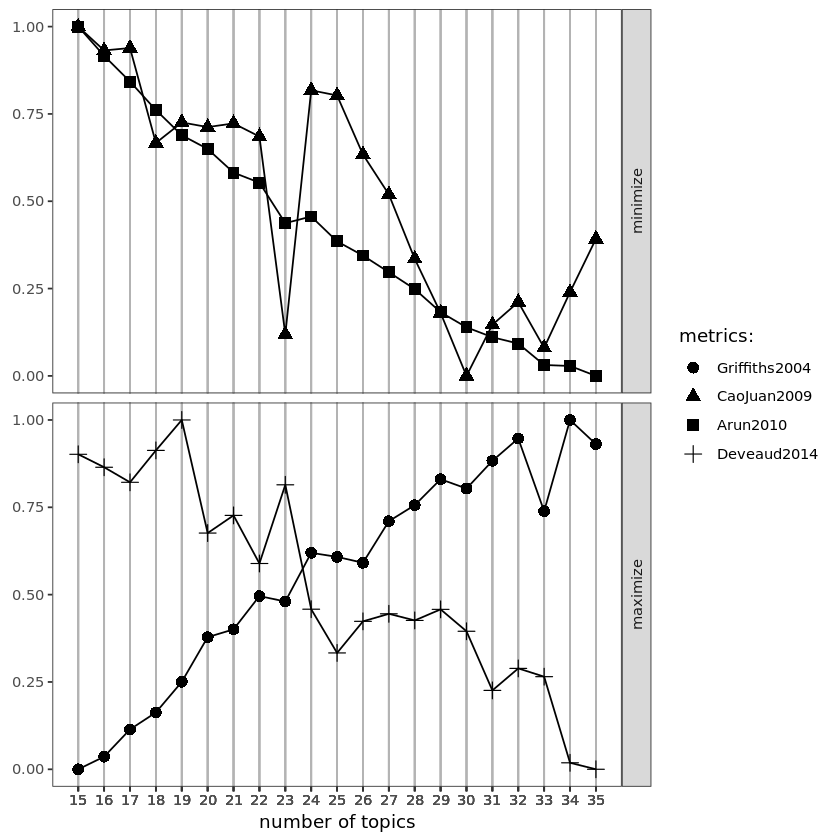

In [12]:
FindTopicsNumber_plot(results_3)

## Create model to be used
Models based on data as of Oct 12, 2020.

In [13]:
narratives_lda <- LDA(word_counts, method = "Gibbs", k = 23, control = list(seed = 912))
saveRDS(narratives_lda, ".temp/narratives_lda.rds")
narratives_lda <- readRDS(".temp/narratives_lda.rds")
narratives_lda

A LDA_Gibbs topic model with 23 topics.

## Get betas and gammas 

In [14]:
gammas <- tidy(narratives_lda, matrix = "gamma")
head(gammas)

document,topic,gamma
<chr>,<int>,<dbl>
20140071,1,0.01809061
20130283,1,0.02092852
20160294,1,0.05881675
20110421,1,0.01386682
20140177,1,0.01668625
20040214,1,0.01959584


In [15]:
betas <- tidy(narratives_lda, matrix = "beta")
head(betas)

topic,term,beta
<int>,<chr>,<dbl>
1,line,7.913214e-05
2,line,7.982247e-06
3,line,4.370248e-03
4,line,8.421904e-06
5,line,6.856923e-06
6,line,3.538048e-01


In [18]:
range(gammas$document)

[1] "20040015" "20200262"

In [19]:
word_counts

<<DocumentTermMatrix (documents: 4096, terms: 7888)>>
Non-/sparse entries: 195788/32113460
Sparsity           : 99%
Maximal term length: 142
Weighting          : term frequency (tf)